# Review

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('./dataset/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
X.shape

(208, 60)

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
e = LabelEncoder()
Y = e.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
model = keras.Sequential()
model.add(keras.layers.Dense(24, input_dim=60, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1464      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [8]:
model.fit(X,Y, epochs=50, batch_size=16)

Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5385
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5769
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.5865
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.6010
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6154
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.6538
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6971
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6683
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6058 - accuracy: 0.7019
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5968 - accuracy: 0.7260
Epoch 11/50
13/13 [

In [9]:
model.save('my_review_model.h5')

del model

In [10]:
model = keras.models.load_model('my_review_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1464      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


In [11]:
df = pd.read_csv('./dataset/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [12]:
X=df.iloc[:,:-1].to_numpy()
Y=df.iloc[:,-1].to_numpy()
X.shape

(6497, 12)

In [13]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, activation='relu', input_dim=12))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                390       
                                                                 
 dense_3 (Dense)             (None, 12)                372       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [15]:
import os
if not os.path.exists('./model/'):
    os.mkdir('./model/')

In [16]:
modelpath = './model/{epoch:03d}-{val_loss:0.4f}.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = modelpath,
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 10
)

In [17]:
hist = model.fit(X,Y, validation_split=0.3, epochs=1000,
                batch_size=500, verbose=1,
                callbacks = [checkpoint, early_stopping])

Epoch 1/1000
 1/10 [==>...........................] - ETA: 4s - loss: 1.8284 - accuracy: 0.3520
Epoch 1: val_loss improved from inf to 0.54463, saving model to ./model\001-0.5446.hdf5
10/10 [==============================] - 1s 27ms/step - loss: 1.0106 - accuracy: 0.4418 - val_loss: 0.5446 - val_accuracy: 0.9672
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.8520
Epoch 2: val_loss improved from 0.54463 to 0.22752, saving model to ./model\002-0.2275.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.4012 - accuracy: 0.8568 - val_loss: 0.2275 - val_accuracy: 0.9738
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.8700
Epoch 3: val_loss improved from 0.22752 to 0.21399, saving model to ./model\003-0.2140.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.3117 - accuracy: 0.8669 - val_loss: 0.2140 - val_accuracy: 0.9631
Epoch 4/1000
 1/10 [==>...........................] 

Epoch 30/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2384 - accuracy: 0.9100
Epoch 30: val_loss improved from 0.18429 to 0.17496, saving model to ./model\030-0.1750.hdf5
10/10 [==============================] - 0s 8ms/step - loss: 0.2104 - accuracy: 0.9215 - val_loss: 0.1750 - val_accuracy: 0.9585
Epoch 31/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.9260
Epoch 31: val_loss did not improve from 0.17496
10/10 [==============================] - 0s 5ms/step - loss: 0.2086 - accuracy: 0.9226 - val_loss: 0.2052 - val_accuracy: 0.9487
Epoch 32/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9300
Epoch 32: val_loss did not improve from 0.17496
10/10 [==============================] - 0s 6ms/step - loss: 0.2063 - accuracy: 0.9239 - val_loss: 0.1964 - val_accuracy: 0.9518
Epoch 33/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.2297 - accuracy: 0.9100
Epoch 33: val_loss did not improve f

Epoch 59/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1214 - accuracy: 0.9620
Epoch 59: val_loss did not improve from 0.05879
10/10 [==============================] - 0s 6ms/step - loss: 0.1083 - accuracy: 0.9683 - val_loss: 0.0746 - val_accuracy: 0.9831
Epoch 60/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.0909 - accuracy: 0.9740
Epoch 60: val_loss did not improve from 0.05879
10/10 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9701 - val_loss: 0.0924 - val_accuracy: 0.9759
Epoch 61/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1158 - accuracy: 0.9740
Epoch 61: val_loss did not improve from 0.05879
10/10 [==============================] - 0s 6ms/step - loss: 0.1096 - accuracy: 0.9670 - val_loss: 0.0849 - val_accuracy: 0.9795
Epoch 62/1000
 1/10 [==>...........................] - ETA: 0s - loss: 0.1250 - accuracy: 0.9600
Epoch 62: val_loss did not improve from 0.05879
10/10 [==========================

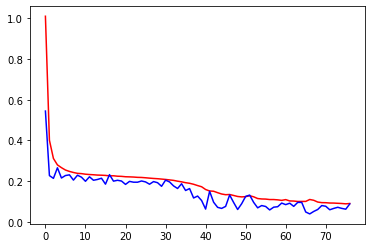

In [18]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

plt.show()

In [19]:
df = pd.read_csv('./dataset/housing.csv', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
X = df.values[:, :-1].astype(np.float32)
Y = df.values[:, -1].astype(np.float32)
X.shape

(506, 13)

In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=13, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 dense_7 (Dense)             (None, 6)                 186       
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics='mse')

In [24]:
hist = model.fit(X,Y, validation_split=0.3, epochs=20, batch_size=50)

Epoch 1/20
8/8 [==============================] - 1s 23ms/step - loss: 926.4572 - mse: 926.4572 - val_loss: 2144.1267 - val_mse: 2144.1267
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 336.8731 - mse: 336.8731 - val_loss: 3800.1077 - val_mse: 3800.1077
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 287.1517 - mse: 287.1517 - val_loss: 1958.5730 - val_mse: 1958.5730
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 186.6421 - mse: 186.6421 - val_loss: 933.9246 - val_mse: 933.9246
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 161.2706 - mse: 161.2706 - val_loss: 986.5878 - val_mse: 986.5878
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 137.2868 - mse: 137.2868 - val_loss: 901.8921 - val_mse: 901.8921
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 122.4564 - mse: 122.4564 - val_loss: 643.4689 - val_mse: 643.4689
Epoch 8/20
8/8 [=========================

In [25]:
hist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

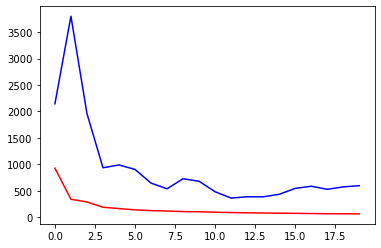

In [26]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')
plt.show()

In [27]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [28]:
print(train_input.shape,test_input.shape)

(60000, 28, 28) (10000, 28, 28)


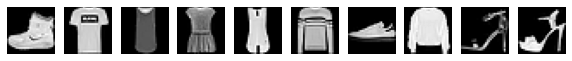

In [29]:
fig, axe = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    axe[i].imshow(train_input[i], cmap='gray')
    axe[i].axis('off')
    
plt.show()

In [30]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [31]:
train_scaled_pre = (train_input/255.).reshape(-1, 28*28)
test_scaled_pre = (test_input/255.).reshape(-1, 28*28)
print(train_scaled_pre.shape, test_scaled_pre.shape)

(60000, 784) (10000, 784)


In [32]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled_pre, train_target, test_size=0.2, stratify=train_target
)

In [33]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [34]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',
             metrics='accuracy',
             optimizer='adam')

In [36]:
hist = model.fit(train_scaled, train_target,
                 validation_data = (val_scaled, val_target),
                epochs=500, batch_size=1024)

Epoch 1/500
47/47 [==============================] - 1s 13ms/step - loss: 0.9743 - accuracy: 0.6712 - val_loss: 0.6161 - val_accuracy: 0.7896
Epoch 2/500
47/47 [==============================] - 0s 10ms/step - loss: 0.5573 - accuracy: 0.8103 - val_loss: 0.5158 - val_accuracy: 0.8272
Epoch 3/500
47/47 [==============================] - 0s 10ms/step - loss: 0.4881 - accuracy: 0.8341 - val_loss: 0.4723 - val_accuracy: 0.8409
Epoch 4/500
47/47 [==============================] - 0s 9ms/step - loss: 0.4527 - accuracy: 0.8446 - val_loss: 0.4494 - val_accuracy: 0.8499
Epoch 5/500
47/47 [==============================] - 0s 10ms/step - loss: 0.4295 - accuracy: 0.8522 - val_loss: 0.4307 - val_accuracy: 0.8526
Epoch 6/500
47/47 [==============================] - 0s 10ms/step - loss: 0.4092 - accuracy: 0.8591 - val_loss: 0.4164 - val_accuracy: 0.8597
Epoch 7/500
47/47 [==============================] - 0s 10ms/step - loss: 0.3943 - accuracy: 0.8630 - val_loss: 0.4086 - val_accuracy: 0.8612
Epoch 8

47/47 [==============================] - 0s 9ms/step - loss: 0.2099 - accuracy: 0.9251 - val_loss: 0.3243 - val_accuracy: 0.8842
Epoch 59/500
47/47 [==============================] - 0s 8ms/step - loss: 0.2125 - accuracy: 0.9240 - val_loss: 0.3192 - val_accuracy: 0.8867
Epoch 60/500
47/47 [==============================] - 0s 9ms/step - loss: 0.2077 - accuracy: 0.9265 - val_loss: 0.3237 - val_accuracy: 0.8847
Epoch 61/500
47/47 [==============================] - 0s 9ms/step - loss: 0.2116 - accuracy: 0.9241 - val_loss: 0.3300 - val_accuracy: 0.8846
Epoch 62/500
47/47 [==============================] - 0s 9ms/step - loss: 0.2038 - accuracy: 0.9277 - val_loss: 0.3237 - val_accuracy: 0.8887
Epoch 63/500
47/47 [==============================] - 0s 9ms/step - loss: 0.2077 - accuracy: 0.9258 - val_loss: 0.3220 - val_accuracy: 0.8869
Epoch 64/500
47/47 [==============================] - 0s 8ms/step - loss: 0.2064 - accuracy: 0.9264 - val_loss: 0.3262 - val_accuracy: 0.8881
Epoch 65/500
47/47 

47/47 [==============================] - 0s 10ms/step - loss: 0.1449 - accuracy: 0.9506 - val_loss: 0.3456 - val_accuracy: 0.8883
Epoch 116/500
47/47 [==============================] - 0s 9ms/step - loss: 0.1421 - accuracy: 0.9523 - val_loss: 0.3438 - val_accuracy: 0.8882
Epoch 117/500
47/47 [==============================] - 0s 9ms/step - loss: 0.1397 - accuracy: 0.9530 - val_loss: 0.3460 - val_accuracy: 0.8871
Epoch 118/500
47/47 [==============================] - 0s 9ms/step - loss: 0.1407 - accuracy: 0.9524 - val_loss: 0.3545 - val_accuracy: 0.8872
Epoch 119/500
47/47 [==============================] - 0s 9ms/step - loss: 0.1376 - accuracy: 0.9532 - val_loss: 0.3485 - val_accuracy: 0.8878
Epoch 120/500
47/47 [==============================] - 0s 10ms/step - loss: 0.1406 - accuracy: 0.9524 - val_loss: 0.3523 - val_accuracy: 0.8859
Epoch 121/500
47/47 [==============================] - 0s 9ms/step - loss: 0.1373 - accuracy: 0.9540 - val_loss: 0.3487 - val_accuracy: 0.8873
Epoch 122/5

47/47 [==============================] - 0s 9ms/step - loss: 0.0995 - accuracy: 0.9688 - val_loss: 0.3938 - val_accuracy: 0.8849
Epoch 173/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0990 - accuracy: 0.9690 - val_loss: 0.4008 - val_accuracy: 0.8832
Epoch 174/500
47/47 [==============================] - 0s 8ms/step - loss: 0.1022 - accuracy: 0.9670 - val_loss: 0.3983 - val_accuracy: 0.8873
Epoch 175/500
47/47 [==============================] - 0s 9ms/step - loss: 0.1002 - accuracy: 0.9679 - val_loss: 0.3925 - val_accuracy: 0.8873
Epoch 176/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0997 - accuracy: 0.9674 - val_loss: 0.3978 - val_accuracy: 0.8834
Epoch 177/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0976 - accuracy: 0.9688 - val_loss: 0.3954 - val_accuracy: 0.8872
Epoch 178/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0966 - accuracy: 0.9700 - val_loss: 0.4058 - val_accuracy: 0.8855
Epoch 179/500

47/47 [==============================] - 0s 9ms/step - loss: 0.0761 - accuracy: 0.9757 - val_loss: 0.4542 - val_accuracy: 0.8827
Epoch 230/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9780 - val_loss: 0.4585 - val_accuracy: 0.8844
Epoch 231/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0731 - accuracy: 0.9778 - val_loss: 0.4647 - val_accuracy: 0.8799
Epoch 232/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0739 - accuracy: 0.9765 - val_loss: 0.4614 - val_accuracy: 0.8849
Epoch 233/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.4646 - val_accuracy: 0.8804
Epoch 234/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0700 - accuracy: 0.9792 - val_loss: 0.4609 - val_accuracy: 0.8822
Epoch 235/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.4684 - val_accuracy: 0.8789
Epoch 236/500

47/47 [==============================] - 0s 8ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.5196 - val_accuracy: 0.8801
Epoch 287/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0526 - accuracy: 0.9849 - val_loss: 0.5257 - val_accuracy: 0.8832
Epoch 288/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.5184 - val_accuracy: 0.8804
Epoch 289/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0541 - accuracy: 0.9843 - val_loss: 0.5206 - val_accuracy: 0.8835
Epoch 290/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.5276 - val_accuracy: 0.8823
Epoch 291/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0556 - accuracy: 0.9835 - val_loss: 0.5272 - val_accuracy: 0.8846
Epoch 292/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.5227 - val_accuracy: 0.8846
Epoch 293/500

47/47 [==============================] - 0s 10ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 0.5878 - val_accuracy: 0.8801
Epoch 344/500
47/47 [==============================] - 0s 11ms/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.5894 - val_accuracy: 0.8796
Epoch 345/500
47/47 [==============================] - 1s 11ms/step - loss: 0.0357 - accuracy: 0.9916 - val_loss: 0.5908 - val_accuracy: 0.8805
Epoch 346/500
47/47 [==============================] - 1s 11ms/step - loss: 0.0396 - accuracy: 0.9890 - val_loss: 0.6046 - val_accuracy: 0.8743
Epoch 347/500
47/47 [==============================] - 1s 11ms/step - loss: 0.0387 - accuracy: 0.9890 - val_loss: 0.5888 - val_accuracy: 0.8816
Epoch 348/500
47/47 [==============================] - 1s 11ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.5967 - val_accuracy: 0.8820
Epoch 349/500
47/47 [==============================] - 0s 9ms/step - loss: 0.0355 - accuracy: 0.9915 - val_loss: 0.5881 - val_accuracy: 0.8804
Epoch 3

47/47 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9935 - val_loss: 0.6523 - val_accuracy: 0.8808
Epoch 401/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0261 - accuracy: 0.9944 - val_loss: 0.6687 - val_accuracy: 0.8788
Epoch 402/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0259 - accuracy: 0.9942 - val_loss: 0.6634 - val_accuracy: 0.8802
Epoch 403/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0275 - accuracy: 0.9934 - val_loss: 0.6564 - val_accuracy: 0.8776
Epoch 404/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9952 - val_loss: 0.6661 - val_accuracy: 0.8788
Epoch 405/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9950 - val_loss: 0.6628 - val_accuracy: 0.8787
Epoch 406/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9949 - val_loss: 0.6646 - val_accuracy: 0.8802
Epoch 407/500

47/47 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9975 - val_loss: 0.7215 - val_accuracy: 0.8775
Epoch 458/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9972 - val_loss: 0.7330 - val_accuracy: 0.8744
Epoch 459/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.9969 - val_loss: 0.7383 - val_accuracy: 0.8787
Epoch 460/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9937 - val_loss: 0.7282 - val_accuracy: 0.8778
Epoch 461/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0196 - accuracy: 0.9961 - val_loss: 0.7249 - val_accuracy: 0.8788
Epoch 462/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9956 - val_loss: 0.7337 - val_accuracy: 0.8767
Epoch 463/500
47/47 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.9974 - val_loss: 0.7350 - val_accuracy: 0.8788
Epoch 464/500

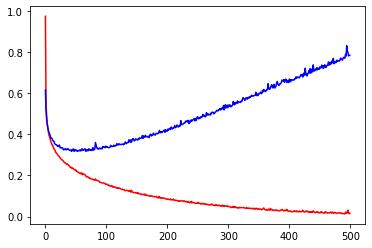

In [37]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')
plt.show()

In [38]:
def model_fn(a_layer=None, name=None):
    model = keras.Sequential(name=name)
    model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [40]:
my_fun = model_fn(name='my_model')
my_fun.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# CNN

In [54]:
(train_input, train_target), (test_input, test_target)\
= keras.datasets.fashion_mnist.load_data()

print(train_input.shape, test_input.shape)

(60000, 28, 28) (10000, 28, 28)


In [55]:
train_scaled_pre = (train_input/255.).reshape(-1,28,28,1)
test_scaled_pre = (test_input/255.).reshape(-1,28,28,1)

print(train_scaled_pre.shape, test_scaled_pre.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [56]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled_pre, train_target, test_size = 0.2, stratify=train_target
)

print(train_scaled.shape, val_scaled.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


In [63]:
model = keras.Sequential()
## ConvLayer1
model.add(keras.layers.Conv2D(filters = 32, kernel_size=3,
                              activation='relu', padding='same',
                             strides = 1, input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=2))

## convLayer2
model.add(keras.layers.Conv2D(filters = 64, kernel_size=3,
                             activation='relu', padding='same',
                             strides = 2))
model.add(keras.layers.MaxPool2D(pool_size=2))

## FCL
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_21 (Dense)            (None, 100)             

In [64]:
# !pip install pydot

In [65]:
# !pip install graphviz

In [66]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn.png', dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [67]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [70]:
checkpoint = keras.callbacks.ModelCheckpoint('./model/best_cnn_model.h5',
                                             verbose=1)
early_stopping = keras.callbacks.EarlyStopping(patience = 5)

hist = model.fit(train_scaled, train_target, epochs=100, batch_size=64,
                validation_data = (val_scaled, val_target),
                callbacks=[checkpoint, early_stopping])

Epoch 1/100
750/750 [==============================] - 18s 24ms/step - loss: 0.1792 - accuracy: 0.9342 - val_loss: 0.2449 - val_accuracy: 0.9127
Epoch 2/100
750/750 [==============================] - 18s 24ms/step - loss: 0.1695 - accuracy: 0.9373 - val_loss: 0.2602 - val_accuracy: 0.9071
Epoch 3/100
750/750 [==============================] - 18s 24ms/step - loss: 0.1600 - accuracy: 0.9401 - val_loss: 0.2512 - val_accuracy: 0.9147
Epoch 4/100
750/750 [==============================] - 19s 26ms/step - loss: 0.1505 - accuracy: 0.9440 - val_loss: 0.2674 - val_accuracy: 0.9099
Epoch 5/100
750/750 [==============================] - 20s 26ms/step - loss: 0.1421 - accuracy: 0.9481 - val_loss: 0.3062 - val_accuracy: 0.9022
Epoch 6/100
750/750 [==============================] - 19s 25ms/step - loss: 0.1342 - accuracy: 0.9501 - val_loss: 0.2937 - val_accuracy: 0.9015


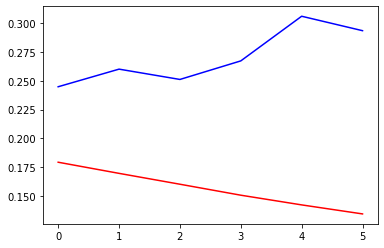

In [71]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')
plt.show()

In [72]:
del model

model = keras.models.load_model('./model/best_cnn_model.h5')

In [74]:
model.evaluate(test_scaled_pre, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.3241 - accuracy: 0.8964


[0.3241187632083893, 0.896399974822998]

In [77]:
np.random.seed(0)
tf.random.set_seed(3)

In [78]:
(x_train, y_train), (x_test, y_test)\
= keras.datasets.mnist.load_data()

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [80]:
x_train = (x_train/255.).reshape(-1,28,28,1)
x_test = (x_test/255.).reshape(-1,28,28,1)

print(x_train.shape, x_test.shape)
print(x_train.dtype, y_train.dtype)

(60000, 28, 28, 1) (10000, 28, 28, 1)
float64 uint8


In [82]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                             input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                     

In [83]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

In [85]:
checkpoint = keras.callbacks.ModelCheckpoint('./model/best_mnist_model.h5',
                                            verbose=1)
early_stopping = keras.callbacks.EarlyStopping(patience=5)

hist = model.fit(x_train,y_train, epochs=30, batch_size=200,
                validation_data = (x_test, y_test),
                callbacks=[checkpoint, early_stopping])

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 1.2200 - accuracy: 0.5887
Epoch 1: saving model to ./model\best_mnist_model.h5
300/300 [==============================] - 68s 224ms/step - loss: 1.2200 - accuracy: 0.5887 - val_loss: 0.3704 - val_accuracy: 0.8982
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.4127 - accuracy: 0.8752
Epoch 2: saving model to ./model\best_mnist_model.h5
300/300 [==============================] - 67s 225ms/step - loss: 0.4127 - accuracy: 0.8752 - val_loss: 0.2595 - val_accuracy: 0.9235
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.3328 - accuracy: 0.8987
Epoch 3: saving model to ./model\best_mnist_model.h5
300/300 [==============================] - 69s 229ms/step - loss: 0.3328 - accuracy: 0.8987 - val_loss: 0.2159 - val_accuracy: 0.9335
Epoch 4/30
300/300 [==============================] - ETA: 0s - loss: 0.2990 - accuracy: 0.9099
Epoch 4: saving model to ./model\best_mnist_model.h5
30

Epoch 30/30
300/300 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9539
Epoch 30: saving model to ./model\best_mnist_model.h5
300/300 [==============================] - 67s 224ms/step - loss: 0.1484 - accuracy: 0.9539 - val_loss: 0.0982 - val_accuracy: 0.9698


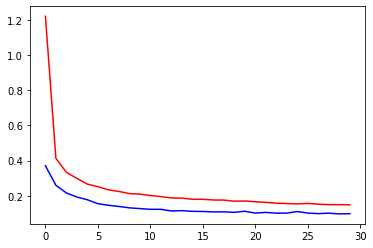

In [86]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')
plt.show()